In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
malware_df = pd.read_csv("../data/dev_small.csv")
malware_df

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,3778538,6c6f494003998c9383c76b2518152640,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0,0,NaN,...,7221.0,0,0.0,0.0,0,0,0.0,0.0,10.0,1
1,6226655,b2b8432b649bd9f208d6a4c5cbf9e951,win8defender,1.1.15100.1,4.10.14393.1794,1.273.1652.0,0,7.0,0,NaN,...,59187.0,0,NaN,0.0,0,0,0.0,0.0,1.0,1
2,493959,0e336045e09ca390c67b54af6c0a35a9,win8defender,1.1.15200.1,4.18.1807.18075,1.275.644.0,0,7.0,0,NaN,...,20388.0,0,NaN,0.0,0,0,0.0,1.0,13.0,0
3,7450186,d5bec8d8f78c95afc0ed74c6b2ae83fa,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1552.0,0,7.0,0,NaN,...,42264.0,0,NaN,0.0,0,0,0.0,1.0,1.0,0
4,7625118,dac8c41a0d8d506561c110ff6c7256e2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.948.0,0,7.0,0,NaN,...,26988.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89210,3261662,5d94137bc804b93923ce14981c4c9698,win8defender,1.1.15100.1,4.10.209.0,1.273.781.0,0,7.0,0,NaN,...,17556.0,1,NaN,0.0,1,0,0.0,0.0,11.0,1
89211,8545024,f5310851036f116efd7a2ab61b5625d4,win8defender,1.1.15200.1,4.13.17134.228,1.275.821.0,0,0.0,1,NaN,...,7936.0,0,NaN,0.0,0,1,0.0,0.0,7.0,1
89212,4234385,798290f94237de1d23603fc40e2bdc02,win8defender,1.1.15100.1,4.18.1807.18075,1.273.591.0,0,7.0,0,NaN,...,26312.0,1,NaN,0.0,0,0,0.0,0.0,3.0,0
89213,1870674,35b017e7cd9c839fbb2ea57d525e6fd0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1686.0,0,7.0,0,NaN,...,33145.0,1,NaN,0.0,1,1,0.0,0.0,13.0,0


**Data Preprocessing**

In [3]:
print("# of machines w/ malware: " + str(malware_df['HasDetections'].sum()))
print("# of machines w/o malware: " + str(len(malware_df['HasDetections']) - malware_df['HasDetections'].sum()))

# of machines w/ malware: 44674
# of machines w/o malware: 44541


In [4]:
print(malware_df.dropna().shape)
print(malware_df.shape)
with pd.option_context('display.max_rows', None):
    display(malware_df.isna().sum())

(0, 84)
(89215, 84)


Unnamed: 0                                               0
MachineIdentifier                                        0
ProductName                                              0
EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
IsBeta                                                   0
RtpStateBitfield                                       330
IsSxsPassiveMode                                         0
DefaultBrowsersIdentifier                            84951
AVProductStatesIdentifier                              379
AVProductsInstalled                                    379
AVProductsEnabled                                      379
HasTpm                                                   0
CountryIdentifier                                        0
CityIdentifier                                        3262
OrganizationIdentifier                               276

In [5]:
nan_counts = malware_df.isna().sum()

features_to_drop = nan_counts[nan_counts >= 1000].index.tolist()
print(features_to_drop)
print("Number of features to be dropped: ", len(features_to_drop))

malware_df = malware_df.drop(columns=features_to_drop)
malware_df

['DefaultBrowsersIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'PuaMode', 'SMode', 'SmartScreen', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_InternalBatteryNumberOfCharges', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsWIMBootEnabled', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']
Number of features to be dropped:  17


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,...,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,HasDetections
0,3778538,6c6f494003998c9383c76b2518152640,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0.0,1
1,6226655,b2b8432b649bd9f208d6a4c5cbf9e951,win8defender,1.1.15100.1,4.10.14393.1794,1.273.1652.0,0,7.0,0,NaN,...,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0.0,1
2,493959,0e336045e09ca390c67b54af6c0a35a9,win8defender,1.1.15200.1,4.18.1807.18075,1.275.644.0,0,7.0,0,53447.0,...,0,IS_GENUINE,OEM:NONSLP,Retail,0,0.0,0,0,0.0,0
3,7450186,d5bec8d8f78c95afc0ed74c6b2ae83fa,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1552.0,0,7.0,0,53447.0,...,0,INVALID_LICENSE,Retail,Retail,0,0.0,0,0,0.0,0
4,7625118,dac8c41a0d8d506561c110ff6c7256e2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.948.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89210,3261662,5d94137bc804b93923ce14981c4c9698,win8defender,1.1.15100.1,4.10.209.0,1.273.781.0,0,7.0,0,49545.0,...,0,IS_GENUINE,Retail,Retail,1,0.0,1,0,0.0,1
89211,8545024,f5310851036f116efd7a2ab61b5625d4,win8defender,1.1.15200.1,4.13.17134.228,1.275.821.0,0,0.0,1,57073.0,...,0,IS_GENUINE,OEM:DM,Retail,0,0.0,0,1,0.0,1
89212,4234385,798290f94237de1d23603fc40e2bdc02,win8defender,1.1.15100.1,4.18.1807.18075,1.273.591.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,1,0.0,0,0,0.0,0
89213,1870674,35b017e7cd9c839fbb2ea57d525e6fd0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1686.0,0,7.0,0,53447.0,...,0,IS_GENUINE,OEM:DM,Retail,1,0.0,1,1,0.0,0


In [6]:
print("Number of rows that have null values: ", malware_df.shape[0] - malware_df.dropna().shape[0])

malware_df = malware_df.dropna()
malware_df

Number of rows that have null values:  5201


,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,...,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,HasDetections
0,3778538,6c6f494003998c9383c76b2518152640,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0.0,1
2,493959,0e336045e09ca390c67b54af6c0a35a9,win8defender,1.1.15200.1,4.18.1807.18075,1.275.644.0,0,7.0,0,53447.0,...,0,IS_GENUINE,OEM:NONSLP,Retail,0,0.0,0,0,0.0,0
3,7450186,d5bec8d8f78c95afc0ed74c6b2ae83fa,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1552.0,0,7.0,0,53447.0,...,0,INVALID_LICENSE,Retail,Retail,0,0.0,0,0,0.0,0
4,7625118,dac8c41a0d8d506561c110ff6c7256e2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.948.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,0,0.0,0,0,0.0,0
5,7218352,cf1abe3dcfa1fb6612215df83c3ae5d7,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1504.0,0,7.0,0,53447.0,...,0,IS_GENUINE,OEM:DM,Retail,1,0.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89210,3261662,5d94137bc804b93923ce14981c4c9698,win8defender,1.1.15100.1,4.10.209.0,1.273.781.0,0,7.0,0,49545.0,...,0,IS_GENUINE,Retail,Retail,1,0.0,1,0,0.0,1
89211,8545024,f5310851036f116efd7a2ab61b5625d4,win8defender,1.1.15200.1,4.13.17134.228,1.275.821.0,0,0.0,1,57073.0,...,0,IS_GENUINE,OEM:DM,Retail,0,0.0,0,1,0.0,1
89212,4234385,798290f94237de1d23603fc40e2bdc02,win8defender,1.1.15100.1,4.18.1807.18075,1.273.591.0,0,7.0,0,53447.0,...,0,IS_GENUINE,Retail,Retail,1,0.0,0,0,0.0,0
89213,1870674,35b017e7cd9c839fbb2ea57d525e6fd0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1686.0,0,7.0,0,53447.0,...,0,IS_GENUINE,OEM:DM,Retail,1,0.0,1,1,0.0,0


In [7]:
malware_df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
print("Number of unique values in each column:")
print(malware_df.nunique())

Number of unique values in each column:
MachineIdentifier                          84014
ProductName                                    2
EngineVersion                                 40
AppVersion                                    75
AvSigVersion                                3738
                                           ...  
Census_IsVirtualDevice                         2
Census_IsTouchEnabled                          2
Census_IsPenCapable                            2
Census_IsAlwaysOnAlwaysConnectedCapable        2
HasDetections                                  2
Length: 66, dtype: int64


In [9]:
categorical_features = [
    'ProductName', 'EngineVersion', 'AppVersion', 'IsBeta', 'RtpStateBitfield',
    'IsSxsPassiveMode', 'HasTpm', 'Platform', 'Processor', 'OsVer', 'OsBuild', 'OsSuite',
    'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
    'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName',
    'Census_HasOpticalDiskDrive', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
    'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSBuildNumber',
    'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
    'Census_OSWUAutoUpdateOptionsName', 'Census_IsPortableOperatingSystem', 'Census_GenuineStateName',
    'Census_ActivationChannel', 'Census_FlightRing', 'Census_IsSecureBootEnabled',
    'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
    'Census_IsAlwaysOnAlwaysConnectedCapable'
]

numerical_features = [
    'AVProductsInstalled', 'AVProductsEnabled', 'Census_ProcessorCoreCount'
]

target_variable = ['HasDetections']

features = categorical_features + numerical_features + target_variable

malware_df = malware_df[features]
malware_df

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,HasTpm,Platform,Processor,OsVer,...,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,HasDetections
0,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,0,0.0,0,0,0.0,1.0,1.0,4.0,1
2,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,0,0.0,0,0,0.0,1.0,1.0,2.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,0,0.0,0,0,0.0,1.0,1.0,2.0,0
4,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,0,0.0,0,0,0.0,1.0,1.0,8.0,0
5,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,1,0.0,0,0,0.0,1.0,1.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89210,win8defender,1.1.15100.1,4.10.209.0,0,7.0,0,1,windows8,x64,6.3.0.0,...,Retail,1,0.0,1,0,0.0,2.0,2.0,8.0,1
89211,win8defender,1.1.15200.1,4.13.17134.228,0,0.0,1,1,windows10,x64,10.0.0.0,...,Retail,0,0.0,0,1,0.0,2.0,1.0,12.0,1
89212,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,1,0.0,0,0,0.0,1.0,1.0,2.0,0
89213,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,1,windows10,x64,10.0.0.0,...,Retail,1,0.0,1,1,0.0,1.0,1.0,8.0,0


In [10]:
sum_unique_values = 0
for column in malware_df[categorical_features].columns:
    if malware_df[column].nunique() <= 100:
        sum_unique_values += malware_df[column].nunique()
print(sum_unique_values)

379


**Encoding and Scaling**

In [11]:
malware_X = malware_df.drop(columns=['HasDetections'])
malware_y = malware_df['HasDetections']

In [12]:
malware_X = pd.get_dummies(malware_X, columns = categorical_features, drop_first=True, dtype=int)
malware_X

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,ProductName_win8defender,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,...,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_IsSecureBootEnabled_1,Census_IsVirtualDevice_1.0,Census_IsTouchEnabled_1,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_1.0
0,1.0,1.0,4.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,1.0,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1.0,8.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1.0,1.0,8.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89210,2.0,2.0,8.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
89211,2.0,1.0,12.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
89212,1.0,1.0,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
89213,1.0,1.0,8.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0


In [13]:
malware_X_dev, malware_X_test, malware_y_dev, malware_y_test = train_test_split(malware_X, malware_y, test_size = 0.2, random_state = 42)

In [14]:
malware_X_dev_numerical = malware_X_dev[numerical_features]
malware_X_test_numerical = malware_X_test[numerical_features]

ss = StandardScaler()
malware_X_dev_numerical_scaled = ss.fit_transform(malware_X_dev_numerical)
malware_X_test_numerical_scaled = ss.transform(malware_X_test_numerical)

malware_X_dev[numerical_features] = malware_X_dev_numerical_scaled
malware_X_test[numerical_features] = malware_X_test_numerical_scaled

In [15]:
malware_X_test

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,ProductName_win8defender,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,...,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_IsSecureBootEnabled_1,Census_IsVirtualDevice_1.0,Census_IsTouchEnabled_1,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_1.0
38175,1.281858,-0.122703,-0.991568,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21738,1.281858,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
38099,-0.629426,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
86018,-0.629426,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
68552,1.281858,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35985,-0.629426,-0.122703,-0.991568,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
58339,-0.629426,-0.122703,-0.991568,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1425,-0.629426,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12596,-0.629426,-0.122703,-0.000649,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(344,)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(malware_X_dev, malware_y_dev, epochs=20, validation_split=0.2)

Epoch 1/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6718 - accuracy: 0.5867 - val_loss: 0.6583 - val_accuracy: 0.6113
Epoch 2/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6632 - accuracy: 0.6022 - val_loss: 0.6604 - val_accuracy: 0.6091
Epoch 3/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6606 - accuracy: 0.6064 - val_loss: 0.6578 - val_accuracy: 0.6130
Epoch 4/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6581 - accuracy: 0.6073 - val_loss: 0.6595 - val_accuracy: 0.6081
Epoch 5/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6564 - accuracy: 0.6113 - val_loss: 0.6571 - val_accuracy: 0.6151
Epoch 6/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6559 - accuracy: 0.6105 - val_loss: 0.6544 - val_accuracy: 0.6091
Epoch 7/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6536 - accuracy: 0.6125 - val_loss: 0.6559 - val_accuracy:

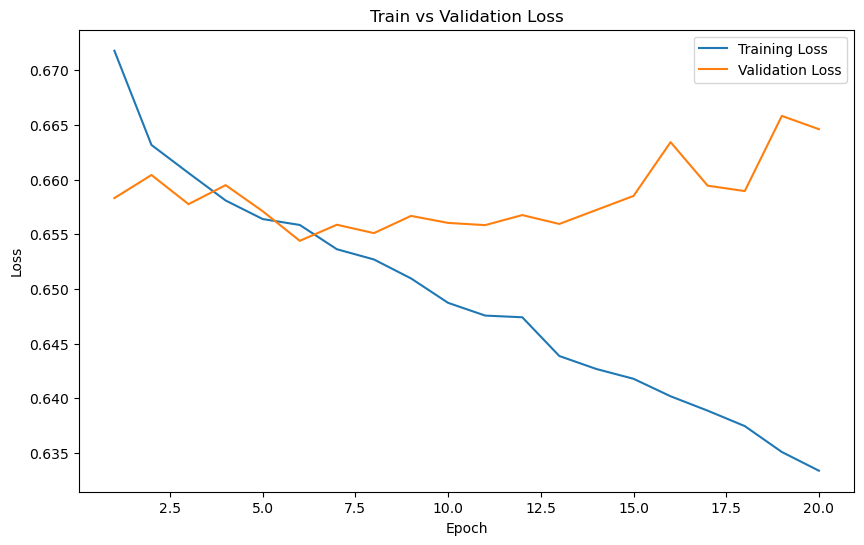

In [20]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(training_loss) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

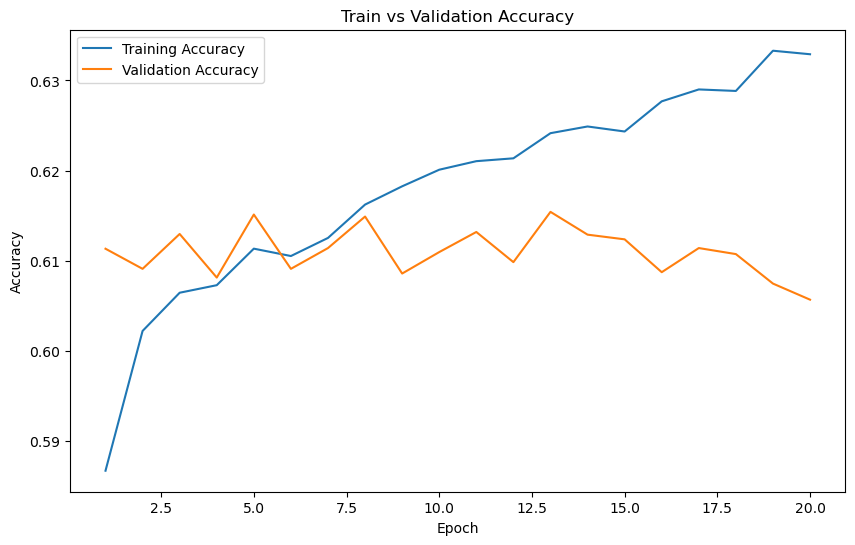

In [21]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(training_acc) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, training_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(malware_X_test, malware_y_test)
print("Test accuracy: ", test_accuracy)

526/526 [==============================] - 0s 382us/step - loss: 0.6655 - accuracy: 0.6058
Test accuracy:  0.6058441996574402


In [23]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(344,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(malware_X_dev, malware_y_dev, epochs=20, validation_split=0.2)

Epoch 1/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6830 - accuracy: 0.5837 - val_loss: 0.6702 - val_accuracy: 0.6000
Epoch 2/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6608 - accuracy: 0.6055 - val_loss: 0.6620 - val_accuracy: 0.6085
Epoch 3/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6575 - accuracy: 0.6086 - val_loss: 0.6574 - val_accuracy: 0.6112
Epoch 4/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6548 - accuracy: 0.6124 - val_loss: 0.6618 - val_accuracy: 0.6016
Epoch 5/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6532 - accuracy: 0.6136 - val_loss: 0.6556 - val_accuracy: 0.6130
Epoch 6/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6503 - accuracy: 0.6168 - val_loss: 0.6578 - val_accuracy: 0.6104
Epoch 7/20
1681/1681 [==============================] - 2s 1ms/step - loss: 0.6493 - accuracy: 0.6176 - val_loss: 0.6575 - val_accuracy:

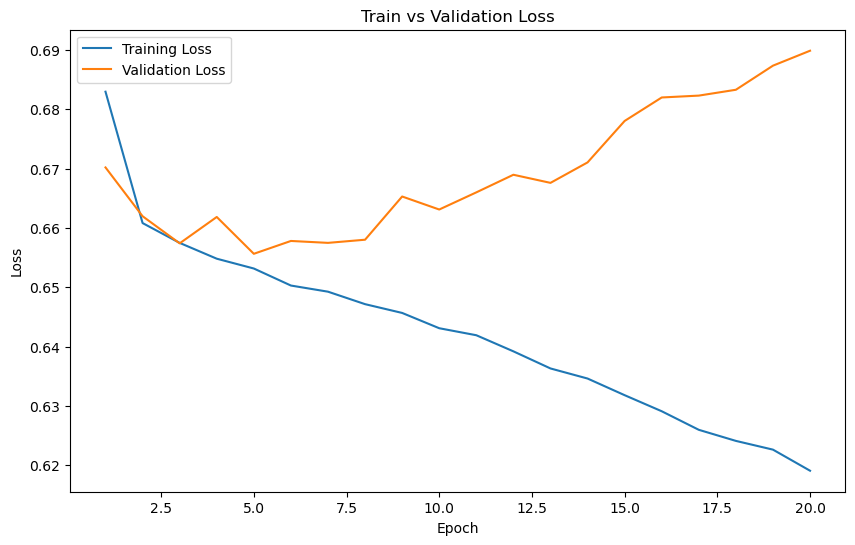

In [26]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(training_loss) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

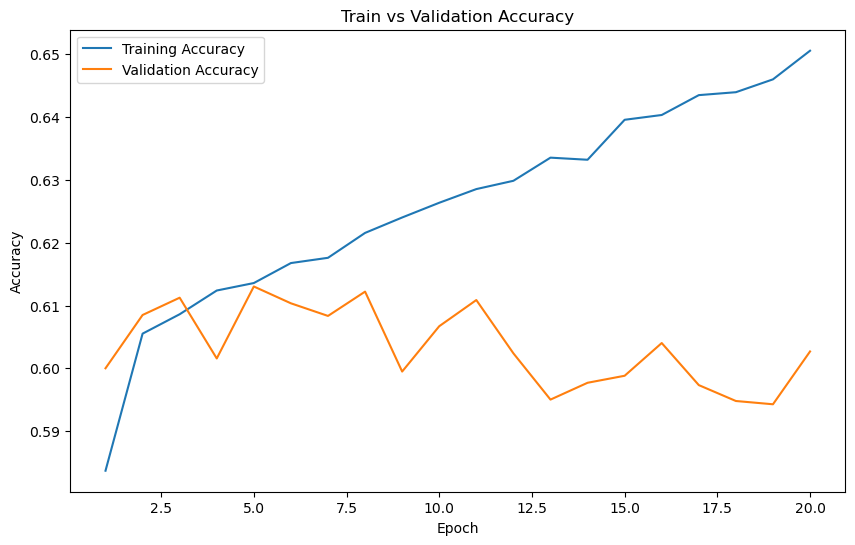

In [27]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(training_acc) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, training_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(malware_X_test, malware_y_test)
print("Test accuracy: ", test_accuracy)

526/526 [==============================] - 0s 419us/step - loss: 0.6896 - accuracy: 0.5970
Test accuracy:  0.5969767570495605


In [29]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from kerastuner import HyperModel, RandomSearch
import random
random.seed(0)
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                        activation='relu', input_shape=(344,)))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

hypermodel = MyHyperModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='hparam_tuning'
)

tuner.search(malware_X_dev, malware_y_dev, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.6134047210216522

Best val_accuracy So Far: 0.6154504120349884
Total elapsed time: 00h 08m 13s


In [31]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               88320     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 416)               106912    
                                                                 
 dropout_1 (Dropout)         (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 417       
                                                                 
Total params: 195649 (764.25 KB)
Trainable params: 195649 (764.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
tuner.results_summary()

Results summary
Results in my_dir/hparam_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units1: 256
dropout1: 0.30000000000000004
units2: 416
dropout2: 0.1
learning_rate: 0.0006287396185200973
Score: 0.6154504120349884

Trial 04 summary
Hyperparameters:
units1: 128
dropout1: 0.4
units2: 160
dropout2: 0.2
learning_rate: 0.0016359861953947116
Score: 0.6150412857532501

Trial 03 summary
Hyperparameters:
units1: 416
dropout1: 0.1
units2: 320
dropout2: 0.0
learning_rate: 0.0001017828863875319
Score: 0.6147437393665314

Trial 06 summary
Hyperparameters:
units1: 256
dropout1: 0.4
units2: 128
dropout2: 0.2
learning_rate: 0.00023870368157235175
Score: 0.6141114234924316

Trial 00 summary
Hyperparameters:
units1: 128
dropout1: 0.2
units2: 224
dropout2: 0.2
learning_rate: 0.00012167923881926731
Score: 0.6138138771057129

Trial 05 summary
Hyperparameters:
units1: 192
dropout1: 0.2
units2: 480
dropout2: 0.1
learning_rate: 0.004504449

In [33]:
test_loss, test_accuracy = best_model.evaluate(malware_X_test, malware_y_test)
print("Test accuracy: ", test_accuracy)

526/526 [==============================] - 0s 478us/step - loss: 0.6596 - accuracy: 0.6070
Test accuracy:  0.6069749593734741


In [34]:
malware_y_pred = best_model.predict(malware_X_test)
binary_predictions = (malware_y_pred > 0.5).astype(int)


526/526 [==============================] - 0s 420us/step


In [35]:
from sklearn.metrics import classification_report
report = classification_report(malware_y_test, binary_predictions)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      8416
           1       0.61      0.60      0.60      8387

    accuracy                           0.61     16803
   macro avg       0.61      0.61      0.61     16803
weighted avg       0.61      0.61      0.61     16803

